<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>



```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






**Contributors:**
+ ... <...@unizar.es>.

---
# **Óptica - Tema 1 - Fourier**

---

# Librerías principales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft
import scipy.constants as constants

plt.rcParams.update({'font.size': 10}) # Tamaño de la fuente del plot

# Funciones importantes

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def onda_plana(t, A, τ, ω_0, φ):
    """
    Genera una onda plana dada la frecuencia central y fase.
    Las unidades han de ser consistentes entre t, τ y ω_0.
    El pulso está normalizado.

    La onda plana se caracteriza por un término exponencial complejo que depende de la frecuencia central de la onda
    y la fase de la envolvente de la onda portadora.

    E(t) = E * exp(i * ω_0 * t) * exp(i * φ(t)) = A * exp(-t² / 2*τ) * exp(i * ( ω_0 * t + φ(t) ) )

    Argumentos:
        t (float): vector de tiempos
        A (float): amplitud del pulso
        τ (float): anchura del pulso
        ω_0 (float): frecuencia central (radianes / unidad de tiempo)
        φ (float): fase de la envolvente de la onda portadora (rad)

    Devuelve:
        E_pulso (float): forma del pulso gaussiano en el tiempo especificado
    """

    return A * np.exp(1j * ( ω_0 * t + φ ))

def pulso_gaussiano(t, A, τ, ω_0, φ):
    """
    Genera un pulso gaussiano dada su duración, frecuencia central y fase.
    Las unidades han de ser consistentes entre t, τ y ω_0.
    El pulso está normalizado.

    Un pulso gaussiano viene caracterizado por una envolvente en forma de gaussiana de expresión:

    E_envolvente = A * exp(-t² / 2*τ)

    Donde τ es la duración temporal del pulso, que está relacionada con el ancho de banda por la expresión:

    τ = FWHM / (2 * √log(2))

    FHWM es la anchura a media altura (full width half maximum).

    La envolvente viene modulada por un término exponencial complejo que depende de la frecuencia central de la onda,
    de manera que el pulso vendrá dado por el producto de la envolvente y esta exponencial, además del producto
    con la exponencial compleja que lleva la fase de la envolvente de la onda portadora.

    E(t) = E_envolvente * exp(i * ω_0 * t) * exp(i * φ(t)) = A * exp(-t² / 2*τ) * exp(i * ( ω_0 * t + φ(t) ) )

    Argumentos:
        t (float): vector de tiempos
        A (float): amplitud del pulso
        τ (float): anchura del pulso
        ω_0 (float): frecuencia central (radianes / unidad de tiempo)
        φ (float): fase de la envolvente de la onda portadora (rad)

    Devuelve:
        E_pulso (float): forma del pulso gaussiano en el tiempo especificado
    """

    return A * np.exp(-t*t / (2 * τ)) * np.exp(1j * ( ω_0 * t + φ ))



def transformada_pulso_gaussiano(ω, A, τ, ω_0, φ):
    """
    Calcula la transformada de Fourier analítica de un pulso gaussiano con una onda moduladora y fase constante.

    El pulso viene dado por:
        f(t) = A * exp(-t² / 2*τ) * exp(i * ( ω_0 * t + φ) )

    Su transformada de Fourier será:
        F(ω) = A  * sqrt(2π / τ) * exp(i * φ) * exp(-(ω - ω_0)²  / (2 * τ))

    Args:
        ω (np.array): array de frecuencias en los que evaluar la transformada
        A (float): Amplitud del pulso
        τ (float): anchura del pulso
        ω_0 (float): frecuencia central (radianes / unidad de tiempo)
        φ (float): fase de la envolvente de la onda portadora (rad) [cte]

    Returns:
        np.array: array de los valores de la transformada de Fourier en las frecuencias dadas
    """

    return A * np.sqrt(2 * np.pi * τ) * np.exp(1j * φ) * np.exp(- (ω - ω_0)*(ω - ω_0) / (2 * τ))



def plot_real_imag(t, pulso, φ_0, I):
    """
    Realiza una representación de las partes real e imaginaria del pulso pasado

    Args:
        t (float, np.array): array de tiempos
        pulso (np.ndarray[np.complex]): array con los valores del pulso en un tiempo t
        φ_0 (float, np.array): array de la fase en un tiempo t
        I (float, np.array): array con la intensidad del pulso en un tiempo t

    Devuelve:
        tuple(matplotlib Figure, matplotlib Axis)
    """
    fig, ax = plt.subplots(2,1)

    # -- Parte real del pulso + envolvente --
    ax[0].plot(t, np.real(pulso), label = r'$\Re \{E(t)\}$')
    ax[0].plot(t, np.sqrt(I), '--', label = 'Envolvente')
    ax[0].plot(t, φ_0, '-.', label = r'$\phi (t)$')
    ax[0].set_xlabel("Tiempo (ps)")
    ax[0].set_ylabel("Campo / Envolvente (Normalizado)")
    ax[0].grid()
    ax[0].legend()


    # -- Parte imaginaria del pulso + envolvente --
    ax[1].plot(t, np.imag(pulso), label = r'$\Im \{E(t)\}$')
    ax[1].plot(t, np.sqrt(I), '--', label = 'Envolvente')
    ax[1].plot(t, φ_0, '-.', label = r'$\phi (t)$')
    ax[1].set_xlabel("Tiempo (ps)")
    ax[1].set_ylabel("Campo / Envolvente (Normalizado)")
    ax[1].grid()
    ax[1].legend()

    fig.suptitle("Partes real e imaginaria del pulso")

    return fig, ax




def plot_intensidad(t, I):
    """
    Realiza una representación de la intensidad del pulso frente al tiempo

    Args:
        t (float, np.array): array de tiempos
        I (float, np.array): array con la intensidad del pulso en un tiempo t

    Devuelve:
        tuple(matplotlib Figure, matplotlib Axis)
    """
    fig, ax = plt.subplots()
    ax.plot(t, I)
    ax.set_xlabel("Tiempo (ps)")
    ax.set_ylabel("Intensidad")
    ax.grid()
    ax.set_title("Intensidad del pulso")

    return fig, ax




def DFT(x):
    """
    Implementación de la transformada discreta de Fourier (DFT).

    La transformada de Fourier viene dada por la siguiente integral:
        F(ω) = ∫f(x)e^{-i 2π ω x} dx

    Que en el caso de tener datos discretos se transforma en un sumatorio:
        Fₙ = ∑₀ᴺ⁻¹ fₖ e^{-i 2π k n / N}

    Cada Fₙ será el resultado de la transformada para el dato fₖ

    El número de operaciones requerido es del orden de O(N²), por lo que para grandes cantidades de datos no es muy eficiente.

    Args:
        x (np.ndarray[np.complex]): array de datos para obtener su transformada de fourier

    Devuelve:
        (np.ndarray[np.complex]): array de datos con la transformada de los datos
    """

    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e,x)

def DFT_sgr(f,ω,t,Δt,Δω):
    """
    Implementación de la transformada discreta de Fourier (DFT).

    La transformada de Fourier viene dada por la siguiente integral:
        F(ω) = ∫f(x)e^{-i 2π ω x} dx

    Que en el caso de tener datos discretos se transforma en un sumatorio:
        Fₙ = ∑₀ᴺ⁻¹ fₖ e^{-i 2π k n / N}

    Cada Fₙ será el resultado de la transformada para el dato fₖ

    El número de operaciones requerido es del orden de O(N²), por lo que para grandes cantidades de datos no es muy eficiente.

    Args:
        x (np.ndarray[np.complex]): array de datos para obtener su transformada de fourier

    Devuelve:
        (np.ndarray[np.complex]): array de datos con la transformada de los datos
    """
    N = f.size
    n = np.arange(N)
    ω = ω.reshape((len(ω), 1))
    e = np.exp(-1j*ω*t )   #n*Δt
    f=f*Δt/np.sqrt(2.0*np.pi)
    return e@f


def inv_DFT_sgr(f,ω,t,Δt,Δω):
    """

    """
    N = f.size
    n = np.arange(N)
    ω = ω.reshape((len(ω), 1))
    e = np.exp(1j*ω*t )   #n*Δt
    f=f*Δω/np.sqrt(2.0*np.pi)
    return f@e


def IDFT(x):
    """
    Implementación de la transformada discreta de Fourier inversa (IDFT).

    La transformada inversa de Fourier viene dada por la siguiente integral:
        f(x) = ∫F(ω)e^{i 2π ω x} dω

    Que en el caso de tener datos discretos se transforma en un sumatorio:
        fₖ = 1 / N · ∑₀ᴺ⁻¹ Fₙ e^{i 2π k n / N}

    Cada fₖ será el resultado de la transformada para el dato Fₙ

    El número de operaciones requerido es del orden de O(N²), por lo que para grandes cantidades de datos no es muy eficiente.

    Args:
        x (np.ndarray[np.complex]): array de datos para obtener su transformada de fourier inversa

    Devuelve:
        np.ndarray[np.complex]: array de datos con la transformada inversa de los datos
    """

    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    #e = np.exp(2j * np.pi * k * n)/N

    #return np.sum(np.dot(e,x) / N) # SGR: cambio (15dic22)
    return np.dot(e,x) / N



def fft(x):
    """
    Implementación de la transformada rápida de Fourier (FFT) mediante el algoritmo de Cooley-Tukey.

    La transformada discreta de Fourier viene dada por:
        Fₙ = ∑₀ᴺ⁻¹ fₖ e^{-i 2π k n / N}

    Cada Fₙ será el resultado de la transformada para el dato fₖ

    El número de operaciones requerido es del orden de O(N²), por lo que puede llegar a ser computacionalmente costoso.

    El algoritmo de Cooley-Tukey es un algoritmo con una complejidad de O(n log n) que consigue reducir el número de operaciones
    dividiendo los datos de entrada en dos secuencias más pequeñas y calculando sus DFT recursivamente.

    Este algoritmo requiere que los datos de entrada tengan una longitud que sea una potencia de 2.
    En el caso que no se cumpla esto, puede rellenarse el array con ceros hasta la siguiente potencia de 2.
    El problema de esto es que la longitud del array devuelto será la de la longitud de la siguiente potencia de 2.
    Una solución para conservar la longitud del array origianal es usar el algoritmo de la transformada de Bluestein.

    Esta función realiza el rellenado del array si es necesario y llama recursivamente a una función
    que contiene el cuerpo del algoritmo.

    Args:
        x (np.ndarray[np.complex]): array de datos para obtener su transformada de fourier inversa

    Devuelve:
        np.ndarray[np.complex]: array de datos con la transformada inversa de los datos
    """
    n = x.size

    # Si el array no tiene una longitud igual a una potencia de dos se aplica el algoritmo de la transformada de bluestein
    if((n & (n-1) == 0) and n != 0) is not True:
        return transformada_bluestein(x, 1)

    return _fft_core(x, 1)




def ifft(x):
    """
    Implementación de la transformada rápida de Fourier inversa (IFFT).

    La transformada discreta de Fourier inversa viene dada por:
        fₖ = 1 / N · ∑₀ᴺ⁻¹ Fₙ e^{i 2π k n / N}

    Cada fₖ será el resultado de la transformada para el dato Fₙ

    El número de operaciones requerido es del orden de O(N²), por lo que puede llegar a ser computacionalmente costoso.

    El algoritmo de Cooley-Tukey es un algoritmo con una complejidad de O(n log n) que consigue reducir el número de operaciones
    dividiendo los datos de entrada en dos secuencias más pequeñas y calculando sus DFT recursivamente.

    Este algoritmo requiere que los datos de entrada tengan una longitud que sea una potencia de 2.
    En el caso que no se cumpla esto, puede rellenarse el array con ceros hasta la siguiente potencia de 2.
    El problema de esto es que la longitud del array devuelto será la de la longitud de la siguiente potencia de 2.
    Una solución para conservar la longitud del array origianal es usar el algoritmo de la transformada de Bluestein.

    Esta función realiza el rellenado del array si es necesario y llama recursivamente a una función
    que tiene el cuerpo del algoritmo.

    Finalmente, divide entre el número de muestras para dar el resultado final.

    Args:
        x (np.ndarray[np.complex]): array de datos para obtener su transformada de fourier inversa

    Devuelve:
        np.ndarray[np.complex]: array de datos con la transformada inversa de los datos
    """
    n = x.size

    # Comprobacion de la longitud del array y añadir ceros si es necesario
    if((n & (n-1) == 0) and n != 0) is not True:
        return transformada_bluestein(x, -1) / n

    return (_fft_core(x, -1)/n)




def _fft_core(x, signo):
    """
    Cuerpo del algoritmo de la transformada rápida de Fourier.

    Esta función es llamada recursivamente para calcular la transformada de los índices pares
    e impares de los datos pasados como argumento.

    Una vez obtenidos se utilizan las ecuaciones del algoritmo de Cooley-Tukey que proporcionan
    los datos finales.

    Este algoritmo no es más que un algoritmo de multiplicación eficiente de polinomios.
    Más información sobre el funcionamiento del algoritmo en: https://www.youtube.com/watch?v=h7apO7q16V0

    Args:
        x (np.ndarray[np.complex]): array de datos para obtener su transformada
        signo (float): signo del exponente de la transformada, que permite diferenciar en el caso de hacer la transformada o su inversa

    Devuelve:
        np.ndarray[np.complex]: array de datos con la transformada de los datos
    """
    n = x.size

    if n == 1:

        return x

    par, impar = _fft_core(x[::2], signo), _fft_core(x[1::2], signo)

    ω = np.exp(- signo * 2 * np.pi * 1j * np.arange(0, n//2) / n)

    y1 = par[0:n//2] + ω * impar[0:n//2]
    y2 = par[0:n//2] - ω * impar[0:n//2]


    return np.concatenate((y1, y2))



def transformada_bluestein(x, signo):
    """
    El algoritmo de Bluestein sirve para calcular la FFT de un array cuya longitud no es una potencia de 2.
    El algoritmo de Bluestein consiste en los siguientes pasos:

        1) Rellenar el array de entrada con ceros para hacer que tenga como longitud una potencia de 2.
        2) Multiplicar el array rellenado por una secuencia especial de "chirp" para "desenrollar" la FFT.
        3) Calcular la FFT de el array resultante utilizando el algoritmo Cooley-Tukey.
        4) Multiplicar el array transformada por otra secuencia especial para "enrollar" de nuevo la DFT.

    Args:
        x (np.ndarray[np.complex]): array de datos para obtener su transformada
        signo (float): signo del exponente de la transformada, que permite diferenciar en el caso de hacer la transformada o su inversa

    Devuelve:
        np.ndarray[np.complex]: array de datos con la transformada de los datos
    """
    n = x.size
    m = 2**((n * 2).bit_length())

    coeficiente = - signo * np.pi / n
    exptable = np.exp(1j * (np.arange(n)**2 % (n * 2)) * coeficiente) # Secuencia de chirp

    a = np.concatenate((x * exptable, np.zeros(m - n)))

    b = np.concatenate((exptable, np.zeros(m - (n * 2 - 1)), np.flip(exptable)[:-1]))
    b = np.conjugate(b)


    c = convolucion(a, b)[:n]

    return c * exptable



def convolucion(x, y):
    """
    Calcula la convolución entre dos arrays de la misma longitud.
    La convolución en el dominio temporal es igual al producto en
    el espacio de frecuencias, por lo que calculamos la fft de ambos
    arrays y luego multiplicamos sus elementos, para después calcular
    su transformada inversa.

    Args:
        x (np.ndarray[np.complex]): array de datos para calcular su convolución con y
        y (np.ndarray[np.complex]): array de datos para calcular su convolución con x

    Returns:
        np.ndarray[np.complex]: convolución entre los dos arrays
    """
    n = x.size

    x_transformada = fft(x)
    y_transformada = fft(y)

    z = ifft(x_transformada * y_transformada)

    return z

# Parámetros

In [34]:
A=1 #30
numero_de_muestras = A*1024

# -- Parámetros del pulso --
A = 1 # Amplitud del pulso
λ_0 = 100.55 # Longitud de onda de ejemplo (en micrómetros)
ω_0 = 2 * np.pi * constants.c * 1e-12 / (λ_0 * 1e-6) # Frecuencia angular del pulso (rad / ps)
φ_0 =  1* np.ones(numero_de_muestras) # Fase (constante en este caso)
#φ_0 = (t-to)**2
print(φ_0)
τ = 1 # Duración del pulso (ps)

print("Frecuencia (rad/ps)=",ω_0)
to=10*τ
t, Δt = np.linspace(0, 20, num=numero_de_muestras, retstep=True) # Vector de tiempos (centrado en cero, ps). Guardamos la separación entre datos
print("Δt (ps)=",Δt)
fs=1/Δt
print("fs=1/Δt sampling rate (1/ps)=",fs)



[1. 1. 1. ... 1. 1. 1.]
Frecuencia (rad/ps)= 18.73348152470267
Δt (ps)= 0.019550342130987292
fs=1/Δt sampling rate (1/ps)= 51.15


# Cálculo de un pulso gaussiano analítico

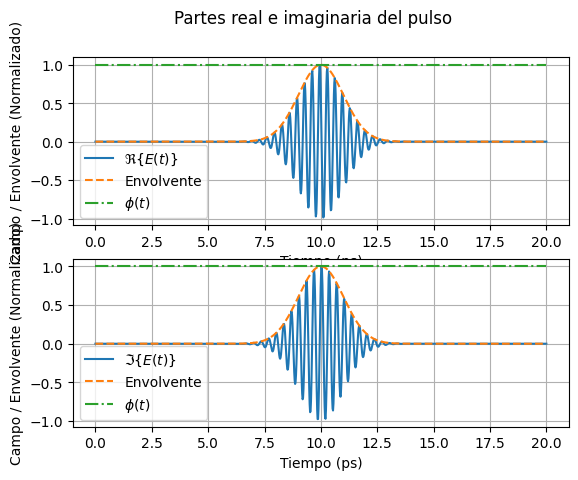

(1024,)


In [35]:
pulso =pulso_gaussiano(t-to, A, τ, ω_0, φ_0) #pulso_gaussiano(t-to, A, τ, ω_0, φ_0) # Vector con el campo complejo del pulso
I = np.abs(pulso) * np.abs(pulso) # Vector con la intensidad del pulso
# Plot partes real e imaginaria del pulso
plot_real_imag(t, pulso, φ_0, I)
plt.show()

pulso_espectro=fft(pulso)
print(pulso_espectro.shape)

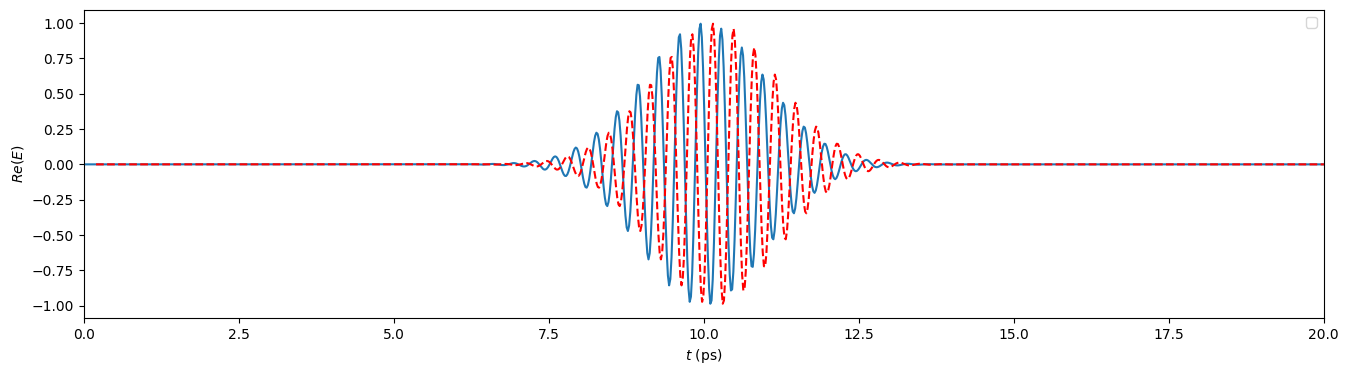

In [36]:
plt.figure(figsize=(16, 4))
plt.plot(t,np.real(pulso))
plt.plot(t+0.2,np.real(pulso),color='red',linestyle='--')

plt.xlabel(r'$t$ (ps)')
plt.ylabel(r'$Re(E)$')
plt.xlim(0,20)
plt.legend()
plt.show()

In [40]:
# Construimos el array de frecuencias angulares
ω = 2 * np.pi * np.arange(numero_de_muestras) / (Δt * numero_de_muestras) # Array de frecuencias angulares (rad / ps)
print("Frecuencia central (rad/ps)=",ω_0)
ω_i = 0.5*ω_0 # Frecuencia angular del pulso (rad / ps)
ω_f = 2.2*ω_0 # Frecuencia angular del pulso (rad / ps)
Δω=(ω_f-ω_i)/(numero_de_muestras)
print("Frecuency range (rad/ps):",ω_i,ω_f)
print("Frecuency range (1/ps):",ω_i/(2.0*np.pi),ω_f/(2.0*np.pi))
fmax=ω_f/(2.0*np.pi)
print("fmax (1/ps)",fmax)
print("fs>2fmax",fs>2*fmax)

print(2 * np.pi / Δt,2 * np.pi /(numero_de_muestras* Δt))
ω2 = ω_i +Δω*np.arange(numero_de_muestras) # Array de frecuencias angulares (rad / ps)
print("Frecuencia (rad/ps)=",ω2)
transformada_analitica = transformada_pulso_gaussiano(ω2, A, τ, ω_0, φ_0) # Transformada analítica de un pulso gaussiano con fase constante
transformada_numerica=fft(pulso)

Frecuencia central (rad/ps)= 18.73348152470267
Frecuency range (rad/ps): 9.366740762351334 41.21365935434587
Frecuency range (1/ps): 1.490763092988563 6.559357609149678
fmax (1/ps) 6.559357609149678
fs>2fmax True
321.38492846223585 0.3138524692014022
Frecuencia (rad/ps)= [ 9.36674076  9.39784127  9.42894178 ... 41.12035784 41.15145834
 41.18255885]


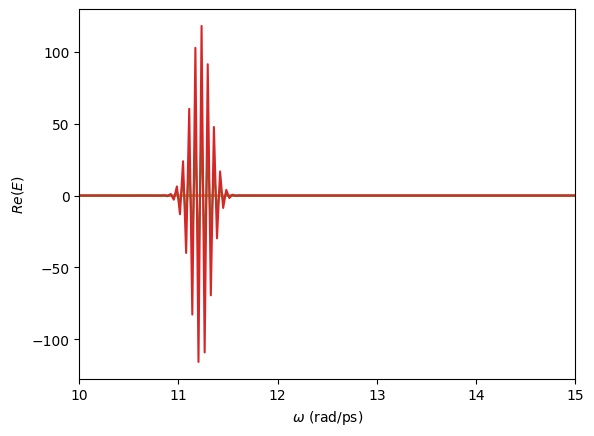

In [44]:
plt.plot(ω2,np.real(transformada_analitica))
plt.plot(ω2,np.imag(transformada_analitica))

plt.plot(ω2,np.real(transformada_numerica))
plt.plot(ω2,np.imag(transformada_numerica))
plt.xlim(10,15)
plt.xlabel(r'$\omega$ (rad/ps)')
plt.ylabel(r'$Re(E)$')
#plt.legend()
plt.show()

 # Comprobamos que el hacer la transformada y su inversa nos devuelve el pulso original

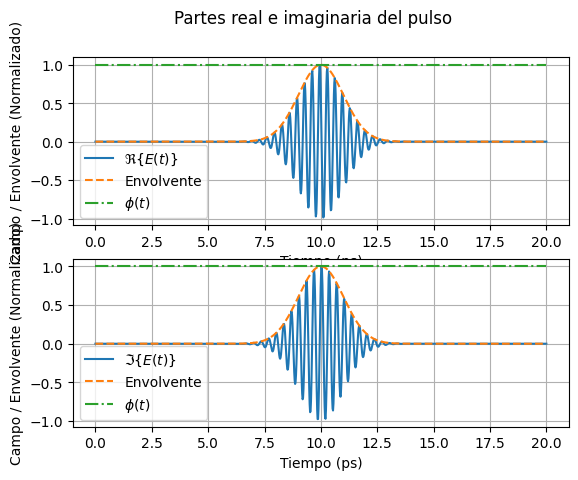

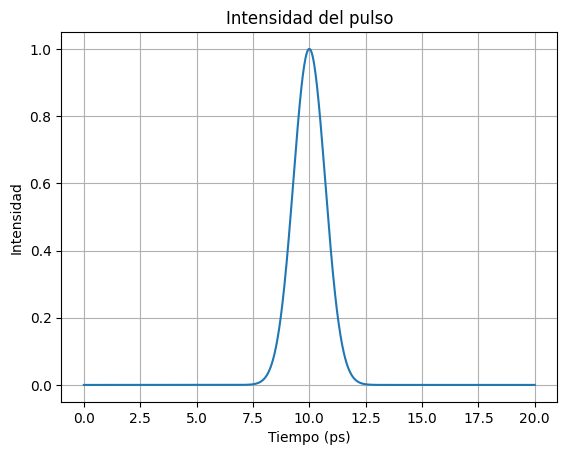

In [39]:
# Comprobamos que el hacer la transformada y su inversa nos devuelve el pulso original
plot_real_imag(t, ifft(fft(pulso)), φ_0, np.abs(ifft(fft(pulso)))**2)
plt.show()

# Plot de la intensidad
plot_intensidad(t, I)
plt.show()

Frecuency range (rad/ps): 607.6295378415656 2673.5699665028887
Frecuency range (1/ps): 96.70724451612904 425.5118758709678
fmax (1/ps) 425.5118758709678
fs>2fmax True
9650.658472562485 0.3141490388203934


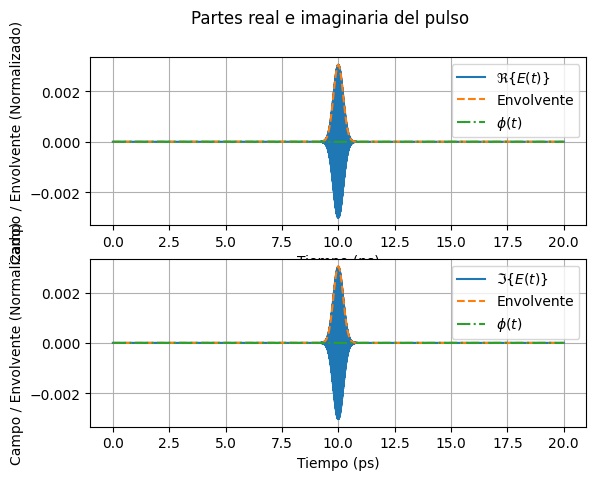

In [ ]:
# Construimos el array de frecuencias angulares
ω = 2 * np.pi * np.arange(numero_de_muestras) / (Δt * numero_de_muestras) # Array de frecuencias angulares (rad / ps)

ω_i = 0.5*ω_0 # Frecuencia angular del pulso (rad / ps)
ω_f = 2.2*ω_0 # Frecuencia angular del pulso (rad / ps)
Δω=(ω_f-ω_i)/(numero_de_muestras)
print("Frecuency range (rad/ps):",ω_i,ω_f)
print("Frecuency range (1/ps):",ω_i/(2.0*np.pi),ω_f/(2.0*np.pi))
fmax=ω_f/(2.0*np.pi)
print("fmax (1/ps)",fmax)
print("fs>2fmax",fs>2*fmax)

print(2 * np.pi / Δt,2 * np.pi /(numero_de_muestras* Δt))
ω2 = ω_i +Δω*np.arange(numero_de_muestras) # Array de frecuencias angulares (rad / ps)

transformada_analitica = transformada_pulso_gaussiano(ω2, A, τ, ω_0, φ_0) # Transformada analítica de un pulso gaussiano con fase constante

# Comprobamos que el hacer su transformada inversa nos devuelve el pulso original
plot_real_imag(t, np.fft.ifftshift((ifft(transformada_analitica))), φ_0, np.abs(np.fft.ifftshift((ifft(transformada_analitica))))**2) #! Hay que centrar el pulso en cero al realizar la inversa. Además no recuperamos amplitud original
plt.show()
#! No devuelve el pulso original. Hay diferencia en la amplitud y también en la fase

# -- Plot : comparación de los resultados obtenidos por np.fft.fft, scipy.fft.fft y mi implementación
transformada_numpy = np.fft.fft(pulso)
transformada_scipy = scipy.fft.fft(pulso)
transformada_propia = DFT_sgr(pulso,ω2,t,Δt,Δω)
transformaeda_propia_inv=inv_DFT_sgr(transformada_propia,ω2,t,Δt,Δω)

# Comprobamos que el hacer la transformada y su inversa nos devuelve el pulso original
plot_real_imag(t, transformaeda_propia_inv, φ_0, np.abs(transformaeda_propia_inv)**2)
plt.show()

diferencias_numpy = np.abs(transformada_numpy) #* 1e13
diferencias_scipy = np.abs(transformada_analitica) #* 1e13
diferencias_ambos = np.abs(transformada_propia) #* 1e13f
print(diferencias_scipy.shape)
print(diferencias_ambos)
fig, ax = plt.subplots(3, 1)
ax[0].plot(ω, diferencias_numpy, label='TF NumPy',marker='o',linewidth=0.5, markersize=2)
ax[1].plot(ω2, diferencias_scipy, label='TF analítica', color='orange',marker='o',linewidth=0.5, markersize=2)
ax[2].plot(ω2, diferencias_ambos, label='TF DFT', color='green',marker='o',linewidth=0.5, markersize=2)
fig.suptitle("Comprobación valores obtenidos con las distintas funciones")
fig.supxlabel("ω (rad / ps)")
fig.supylabel(r"Diferencia entre valores") #" ($\times 10^{-13}$)")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].legend()
ax[1].legend()
ax[2].legend()

for i in range(0,3):
    ax[i].set_xlim(1200,1240)

plt.show()

